In [1]:
# Load libraries
library(tidyverse)
library(lubridate)
library(forcats)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
# Import the data from the King County Housing csv file
df_orig <- read_csv("kc_house_data.csv")

# Show a preview of the data, including the number of Observations and Variables
glimpse(df_orig)
summary(df_orig)

Parsed with column specification:
cols(
  .default = col_integer(),
  id = col_character(),
  date = col_datetime(format = ""),
  price = col_double(),
  bathrooms = col_double(),
  floors = col_double(),
  lat = col_double(),
  long = col_double()
)
See spec(...) for full column specifications.


Observations: 21,613
Variables: 21
$ id            <chr> "7129300520", "6414100192", "5631500400", "2487200875...
$ date          <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 2015...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,...
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4,...
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7...
$ sqft_above    <

      id                 date                         price        
 Length:21613       Min.   :2014-05-02 00:00:00   Min.   :  75000  
 Class :character   1st Qu.:2014-07-22 00:00:00   1st Qu.: 321950  
 Mode  :character   Median :2014-10-16 00:00:00   Median : 450000  
                    Mean   :2014-10-29 04:38:01   Mean   : 540088  
                    3rd Qu.:2015-02-17 00:00:00   3rd Qu.: 645000  
                    Max.   :2015-05-27 00:00:00   Max.   :7700000  
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 0.000   Min.   :0.000   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.371   Mean   :2.115   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688  
 Max.   :33.000   Max.   :8.000   Max.   :13540   Max.   :1651359  
     floors        waterfront            view   

In [3]:
# Transformation 1: Update the strings in this data set
# create additional factor columns for floors, waterfront, view, condition, grade, zipcode
# change missing data in yr_renovated (0 to NA)
df1 <- df_orig %>%
  mutate(floors_fac = as.factor(floors),
         waterfront_lgl = as.logical(waterfront),
         view_fac = as.factor(view),
         condition_fac = as.factor(condition),
         grade_fac = as.factor(grade),
         zipcode_fac = as.factor(zipcode),
         yr_renovated = replace(yr_renovated, yr_renovated==0, NA))

# create additional factor columns for bedrooms, yr_built
# for this basic analysis, grouping by median values to reduce the number of factor levels 
df2 <- df1 %>%
  mutate(bedrooms_fac = as.factor(ifelse(bedrooms<=median(bedrooms),"<=3",">3")),
         yr_built_fac = as.factor(ifelse(yr_built<=median(yr_built),"<=1975",">1975")))

In [4]:
# Transformation 2: Update the date
df3 <- df2 %>% mutate(date = as_date(date))
glimpse(df3)

Observations: 21,613
Variables: 29
$ id             <chr> "7129300520", "6414100192", "5631500400", "248720087...
$ date           <date> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 201...
$ price          <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257...
$ bedrooms       <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4...
$ bathrooms      <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00...
$ sqft_living    <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780,...
$ sqft_lot       <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 7...
$ floors         <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1....
$ waterfront     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ view           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...
$ condition      <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4...
$ grade          <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, ...
$ sqft_above     

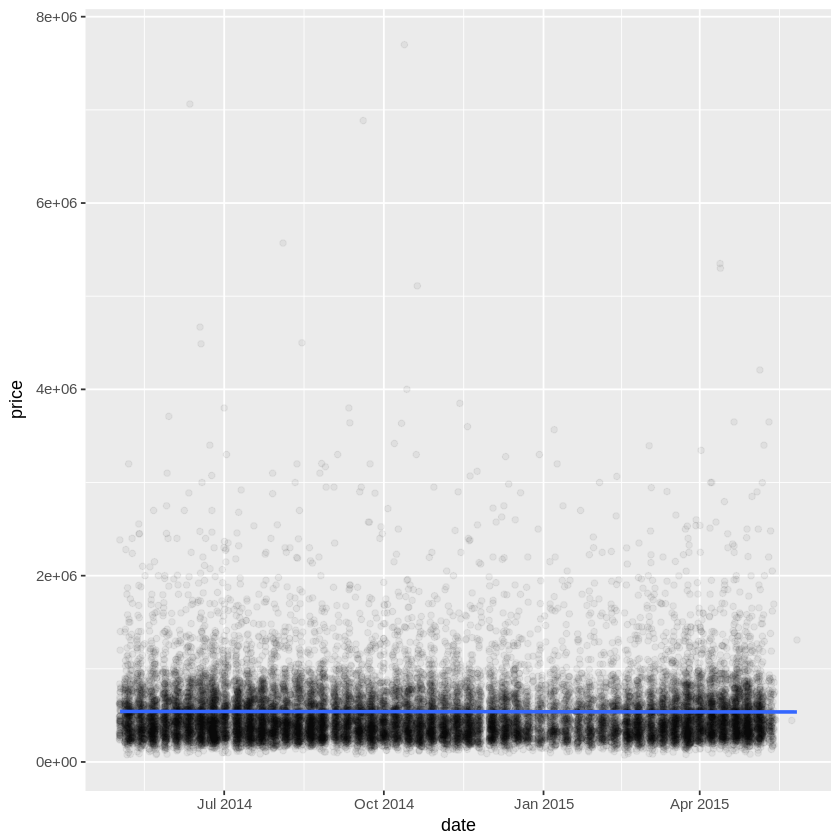

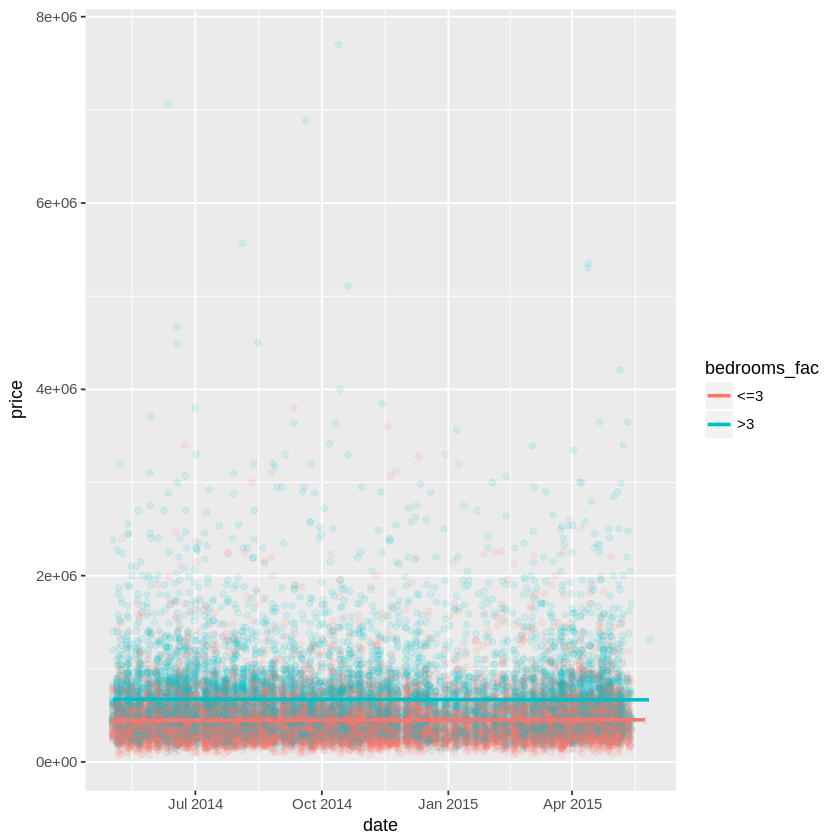

In [5]:
# Transformation 3, 4: Create 3 or more scatterplots 
# with date as the x-axis and a continuous variable on the y-axis
# For the above scatterplots, include categorical variables from your string data. 
# Use, color, shape, size, facet_wrap() and facet_grid() as appropriate.

#price vs. date
ggplot(df3, mapping = aes(x = date, y = price)) +  
  geom_jitter(alpha = 0.05) +
  geom_smooth(method = "lm", se = FALSE)

ggplot(df3, mapping = aes(x = date, y = price, color = bedrooms_fac)) +  
  geom_jitter(alpha = 0.1) +
  geom_smooth(method = "lm", se = FALSE)

Information:
Due to the variability in prices, plotting all data points makes it harder to spot the trend, if any.
For the following basic analysis, plotting only trendlines to determine any general patterns.

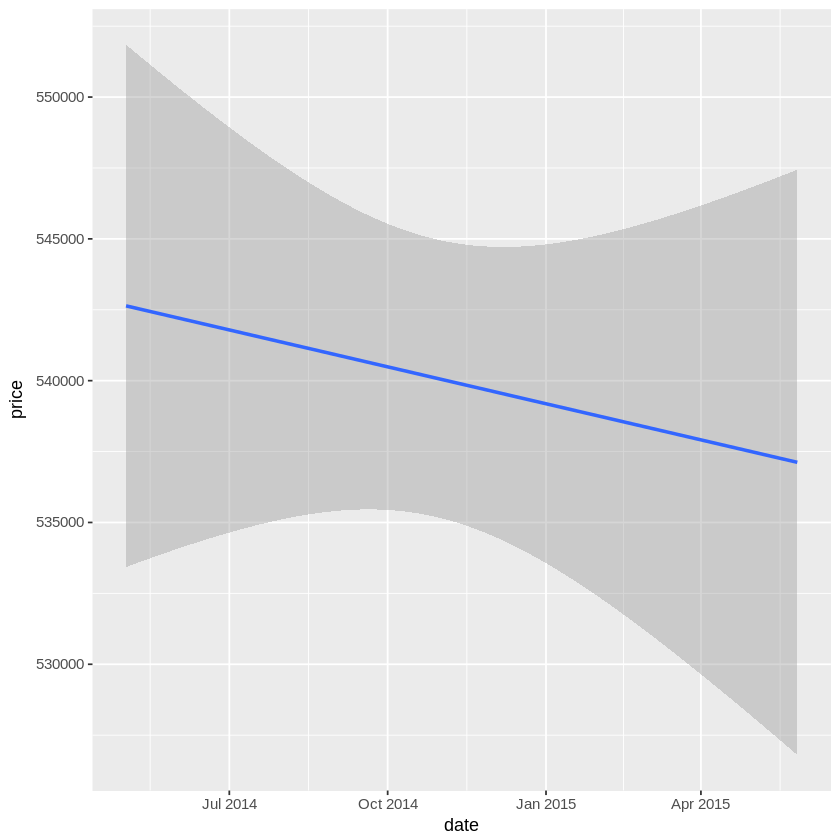

In [6]:
ggplot(df3, mapping = aes(x = date, y = price)) +  
  geom_smooth(method = "lm", se = TRUE)

Information: 
From 2014-05-02 to 2015-05-27, home prices did not appear to change significantly but there is an overall negative trend.

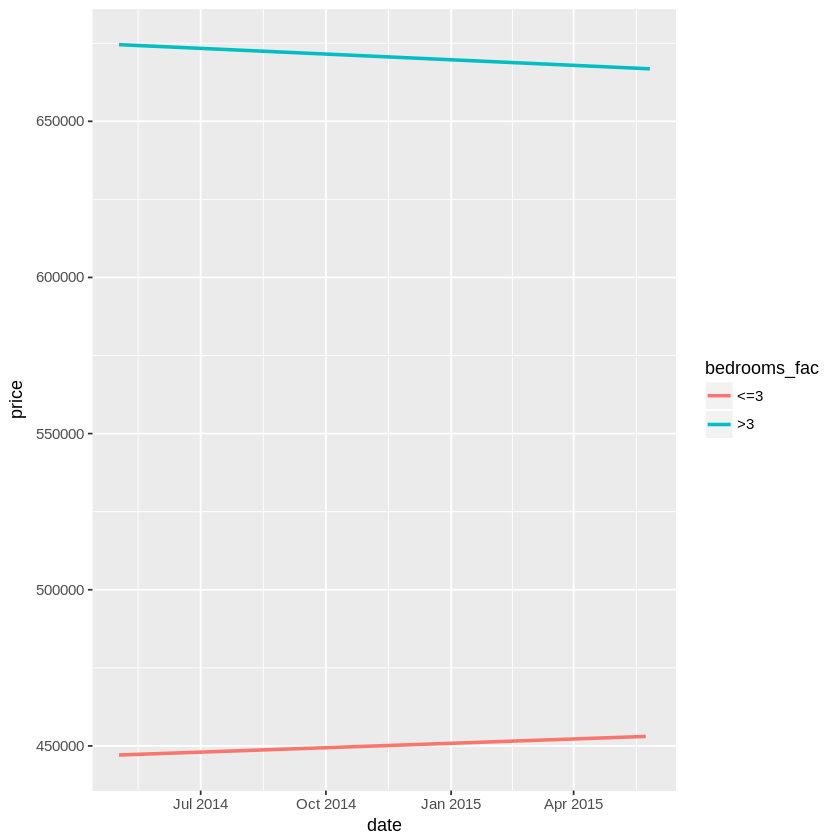

In [7]:
ggplot(df3, mapping = aes(x = date, y = price, color = bedrooms_fac)) +  
  geom_smooth(method = "lm", se = FALSE)

Information: 
Price trend is negative for homes with >3 bedrooms but is positive for homes with <=3 bedrooms. 
(Median number of bedrooms in dataset is 3.)

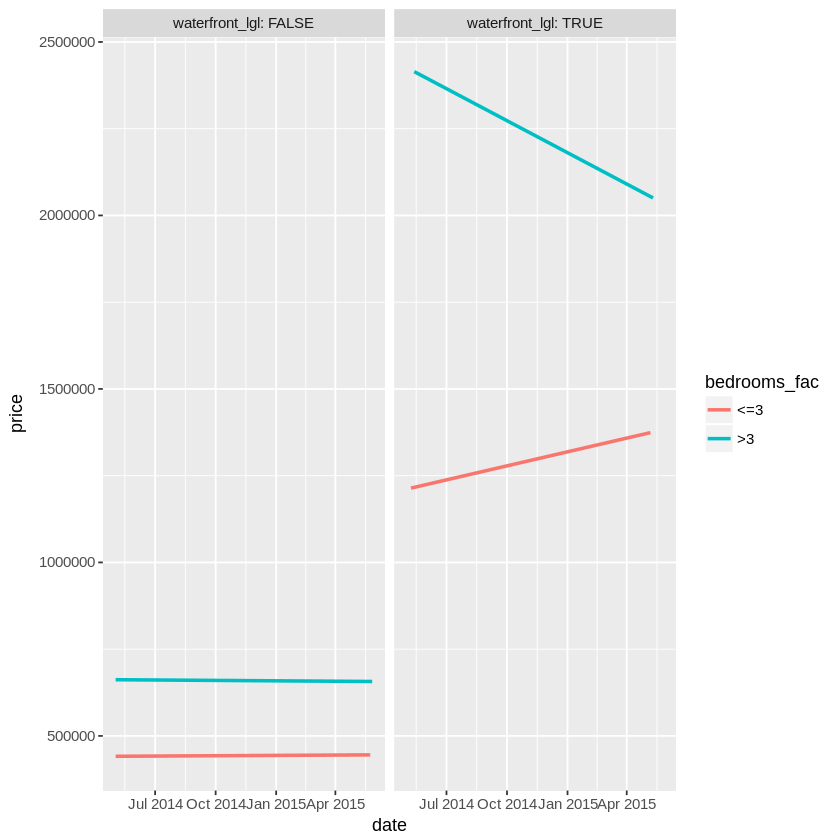

In [8]:
ggplot(df3, mapping = aes(x = date, y = price, color = bedrooms_fac)) +  
  #geom_jitter(alpha = 0.1) +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ waterfront_lgl, labeller = label_both)

Information:
Price trend is negative for homes with waterfront and >3 bedrooms but is positive for homes with waterfront and <=3 bedrooms. 
Relative to waterfront homes, price trend is flat for non-waterfront homes. (However, only 0.75% of homes in the dataset are waterfront homes, although they sold at higher prices.)

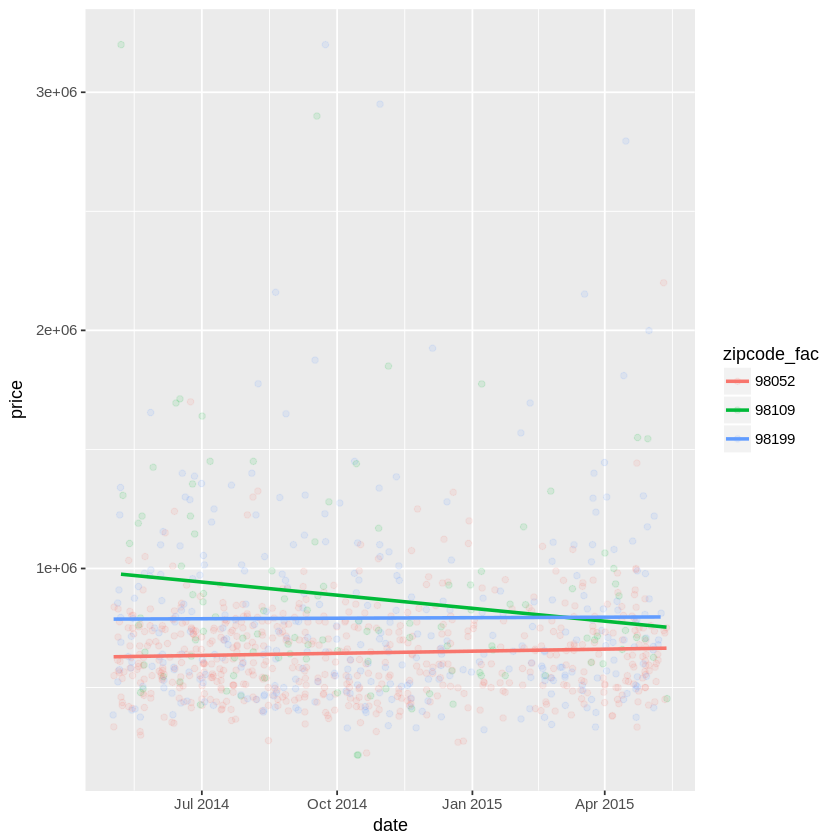

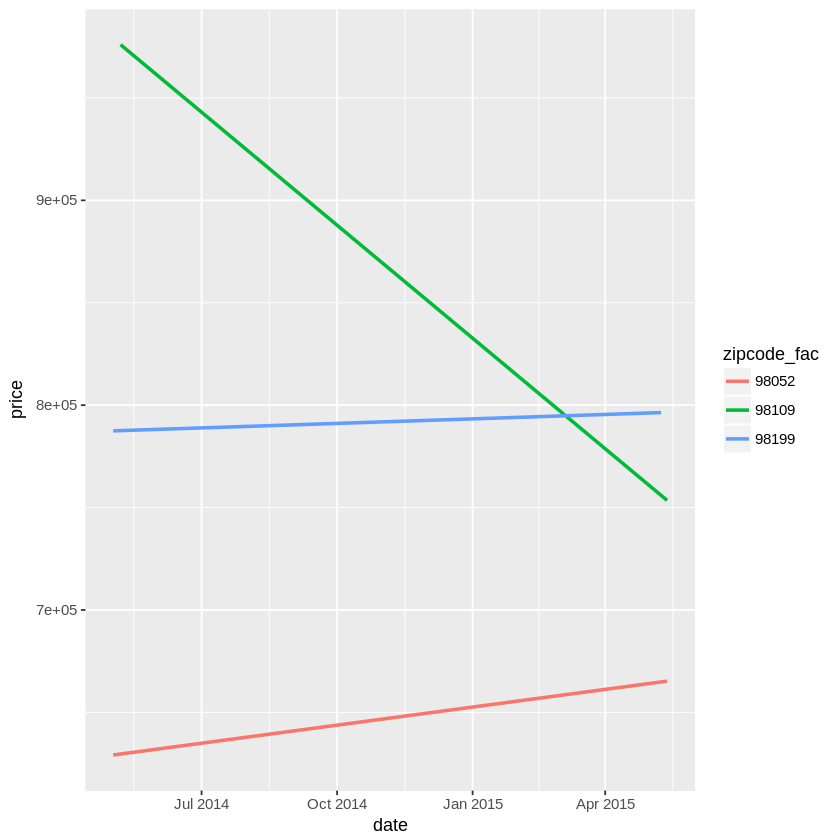

In [9]:
# Analyzing a subset of 3 zipcodes
df_zip <- df3 %>% filter(zipcode_fac %in% c(98052, 98109, 98199)) %>% mutate(zipcode_fac = fct_drop(zipcode_fac))
#summary(df_zip)
ggplot(df_zip, mapping = aes(x = date, y = price, color = zipcode_fac)) +  
  geom_jitter(alpha = 0.1) + 
  geom_smooth(method = "lm", se = FALSE)

ggplot(df_zip, mapping = aes(x = date, y = price, color = zipcode_fac)) +  
  #geom_jitter(alpha = 0.1) + 
  geom_smooth(method = "lm", se = FALSE)

Information: 
For the 3 zipcodes analyzed, price trend is negative for 98109, positive for 98052 and 98199.

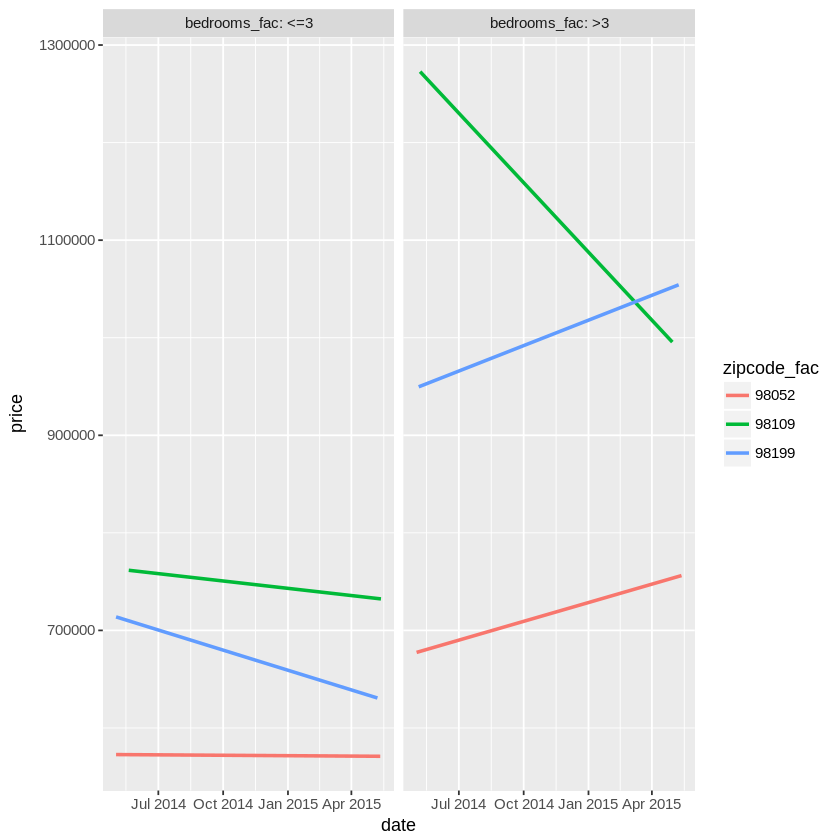

In [10]:
ggplot(df_zip, mapping = aes(x = date, y = price, color = zipcode_fac)) +  
  #geom_jitter(alpha = 0.1) + 
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~bedrooms_fac, labeller = label_both)

Information: 
For 98199, price trends in opposite directions for homes with <=3 and >3 bedrooms.

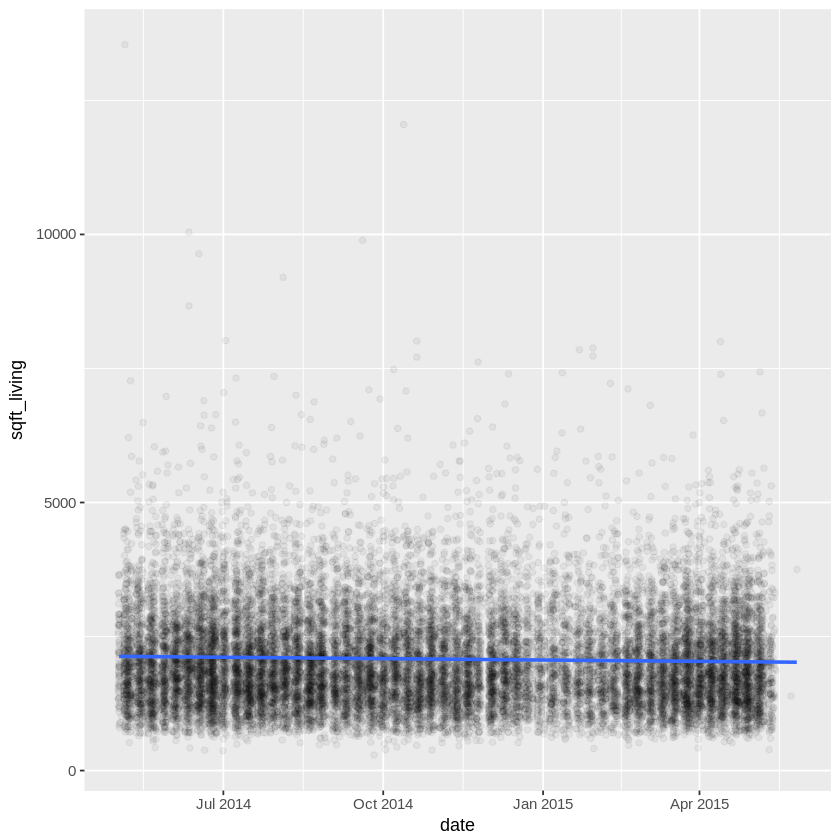

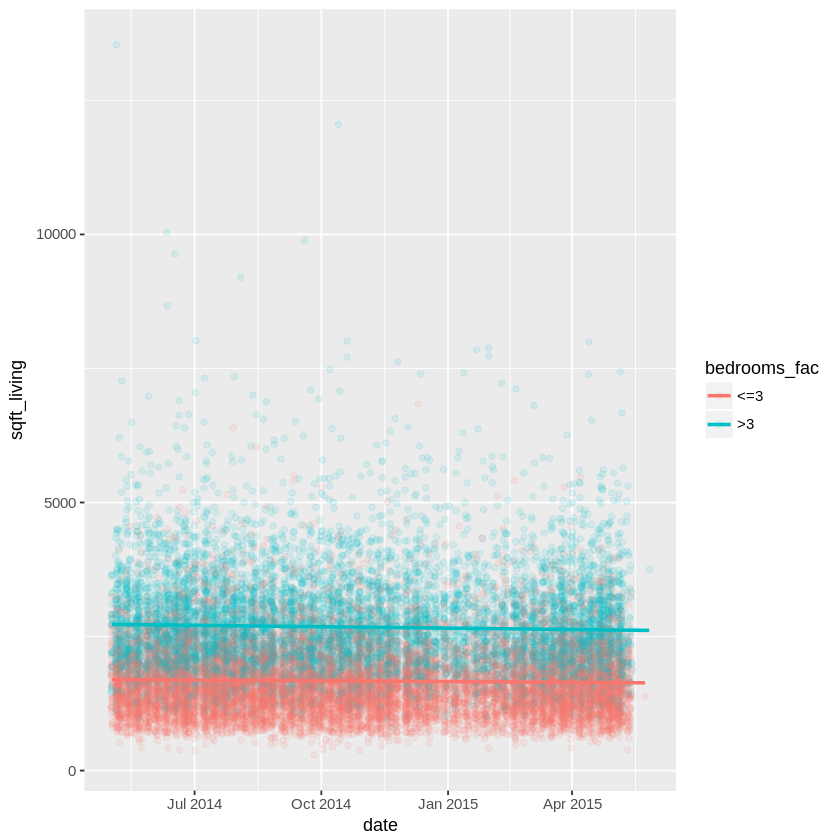

In [11]:
# sqft_living vs. date
ggplot(df3, mapping = aes(x = date, y = sqft_living)) +  
  geom_jitter(alpha = 0.05) +
  geom_smooth(method = "lm", se = FALSE)

ggplot(df3, mapping = aes(x = date, y = sqft_living, color = bedrooms_fac)) +  
  geom_jitter(alpha = 0.1) +
  geom_smooth(method = "lm", se = FALSE)

Information:
Due to the variability in sqft_living, plotting all data points makes it harder to spot the trend, if any.
For the following basic analysis, plotting only trendlines to determine any general patterns.

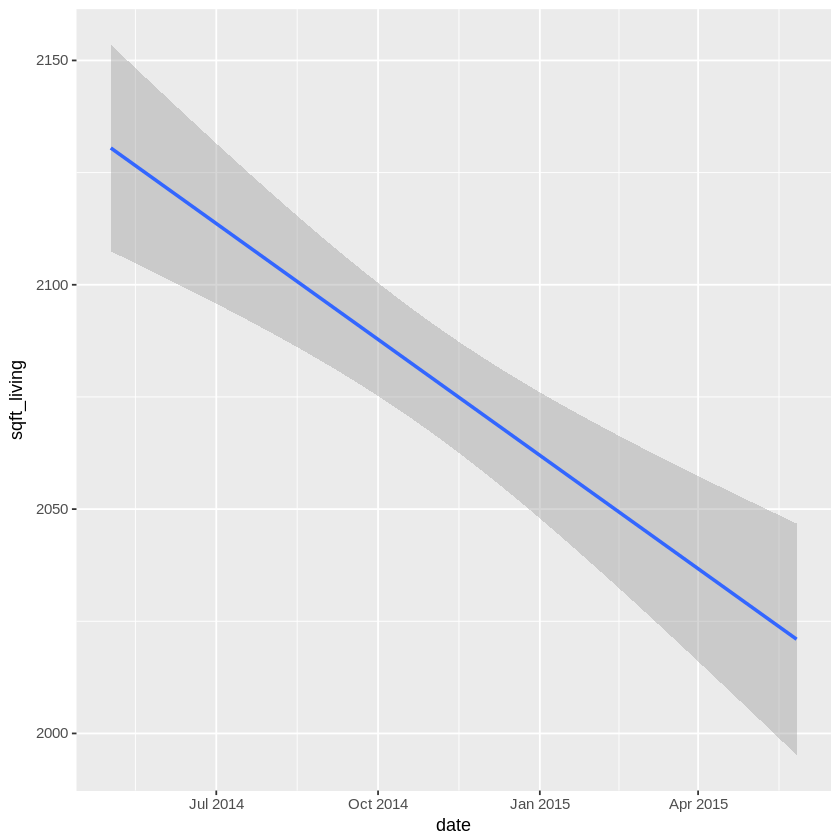

In [12]:
ggplot(df3, mapping = aes(x = date, y = sqft_living)) +  
  geom_smooth(method = "lm", se = TRUE)

Information: 
From 2014-05-02 to 2015-05-27, sqft_living for homes sold did not appear to change significantly but there is an overall negative trend.

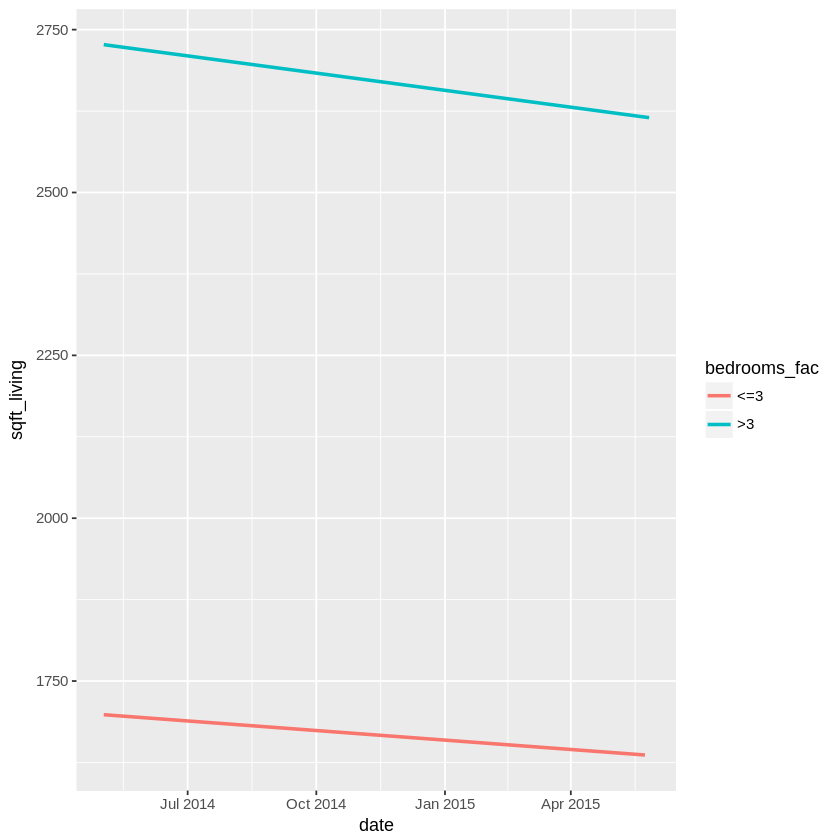

In [13]:
ggplot(df3, mapping = aes(x = date, y = sqft_living, color = bedrooms_fac)) +  
  geom_smooth(method = "lm", se = FALSE)

Information: 
sqft_living trend is negative for homes with both <=3 bedrooms and >3 bedrooms.

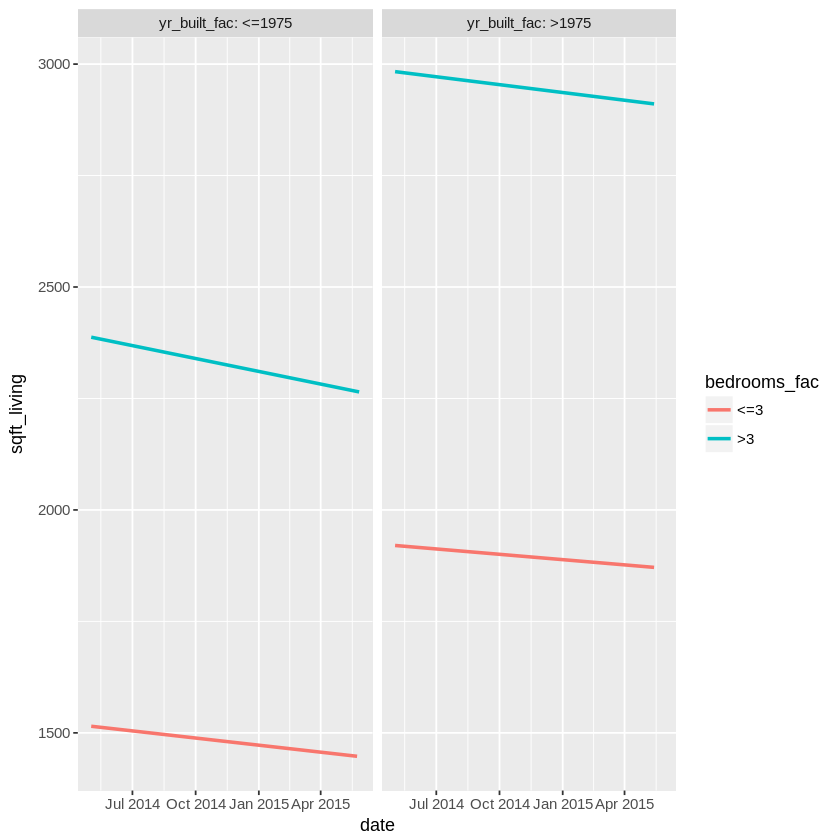

In [14]:
ggplot(df3, mapping = aes(x = date, y = sqft_living, color = bedrooms_fac)) +  
  #geom_jitter(alpha = 0.1) +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ yr_built_fac, labeller = label_both)

Information: 
sqft_living trend is negative for homes with both <=3 bedrooms and >3 bedrooms, with yr_built either <=1975 or >1975.

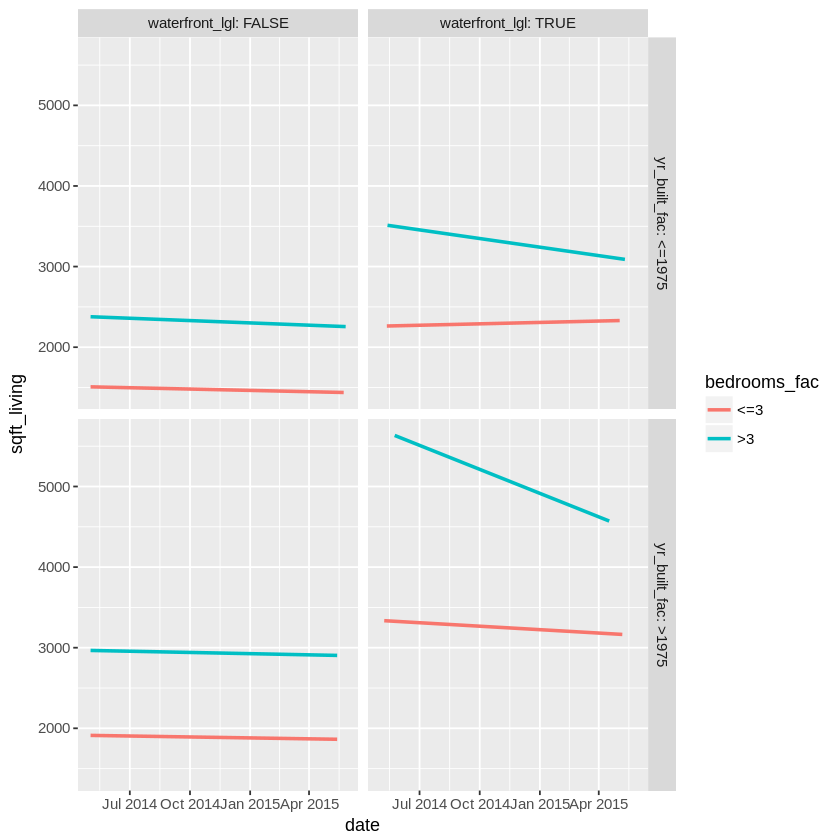

In [15]:
ggplot(df3, mapping = aes(x = date, y = sqft_living, color = bedrooms_fac)) +  
  #geom_jitter(alpha = 0.1) +
  geom_smooth(method = "lm", se = FALSE) +
  facet_grid(yr_built_fac ~ waterfront_lgl, labeller = label_both)

Information: 
sqft_living trend is the steepest for homes with waterfront, >3 bedrooms, and yr_built>1975. 
Relative to waterfront homes, sqft_living trend is flat for non-waterfront homes. 
(However, only 0.75% of homes in the dataset are waterfront homes, although they have higher sqft_living.)

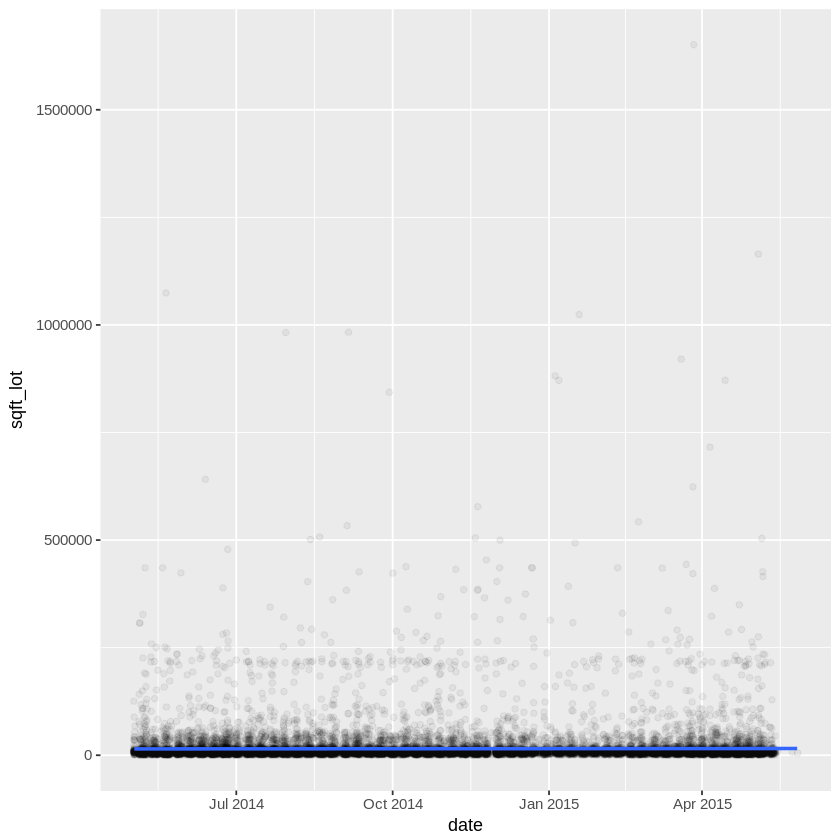

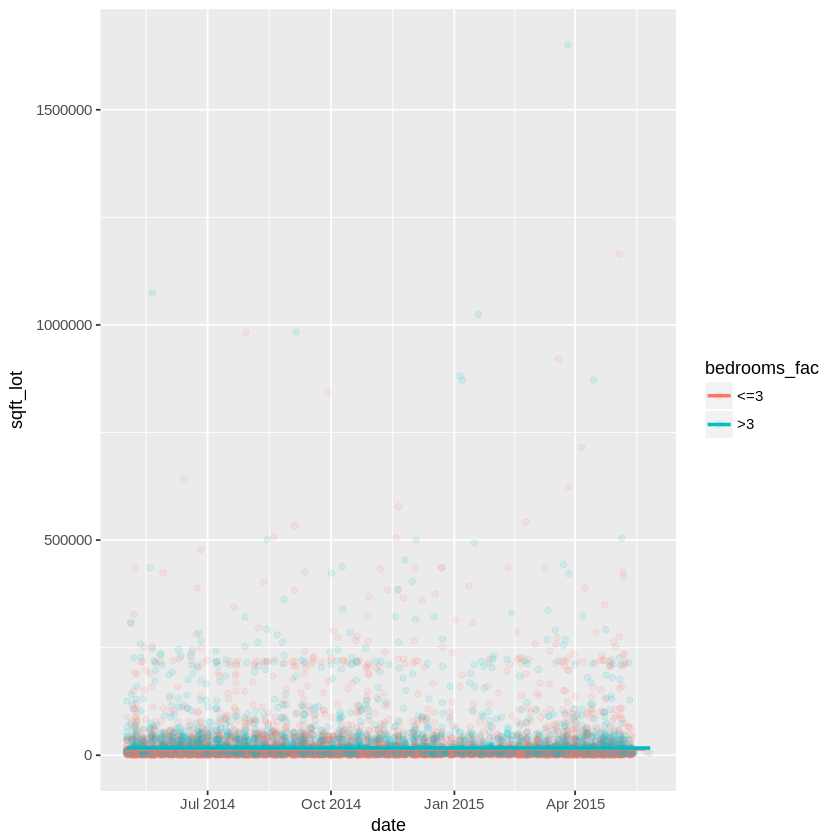

In [16]:
# sqft_lot vs. date
ggplot(df3, mapping = aes(x = date, y = sqft_lot)) +  
  geom_jitter(alpha = 0.05) +
  geom_smooth(method = "lm", se = FALSE)

ggplot(df3, mapping = aes(x = date, y = sqft_lot, color = bedrooms_fac)) +  
  geom_jitter(alpha = 0.1) +
  geom_smooth(method = "lm", se = FALSE)

Information:
Due to the variability in sqft_lot, plotting all data points makes it harder to spot the trend, if any.
For the following basic analysis, plotting only trendlines to determine any general patterns.

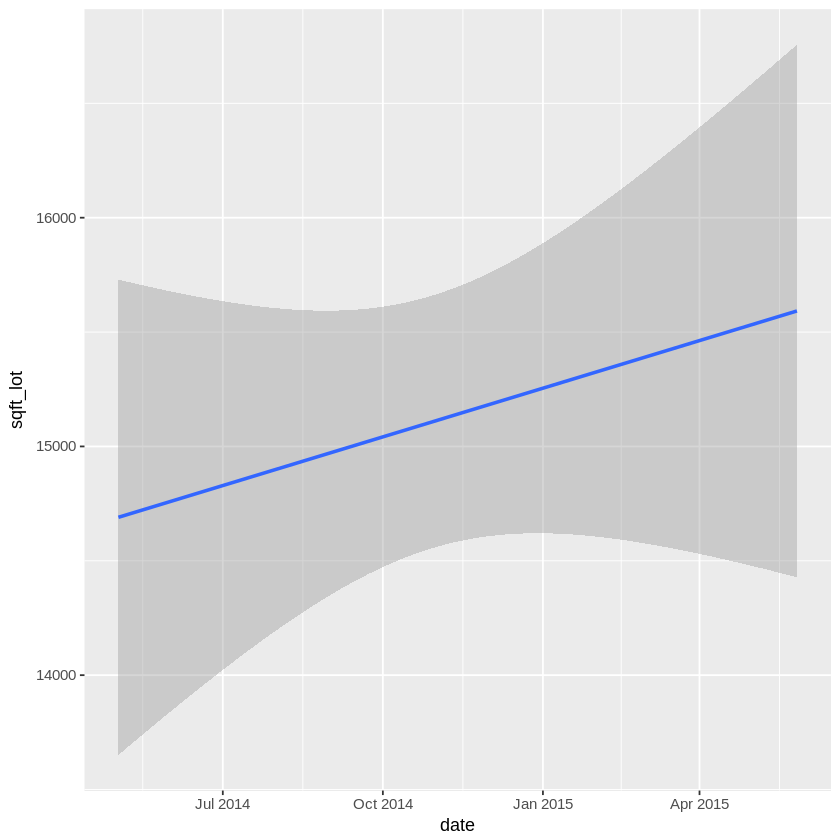

In [17]:
ggplot(df3, mapping = aes(x = date, y = sqft_lot)) +  
  geom_smooth(method = "lm", se = TRUE)

Information: 
From 2014-05-02 to 2015-05-27, sqft_lot for homes sold did not appear to change significantly but there is an overall positive trend.

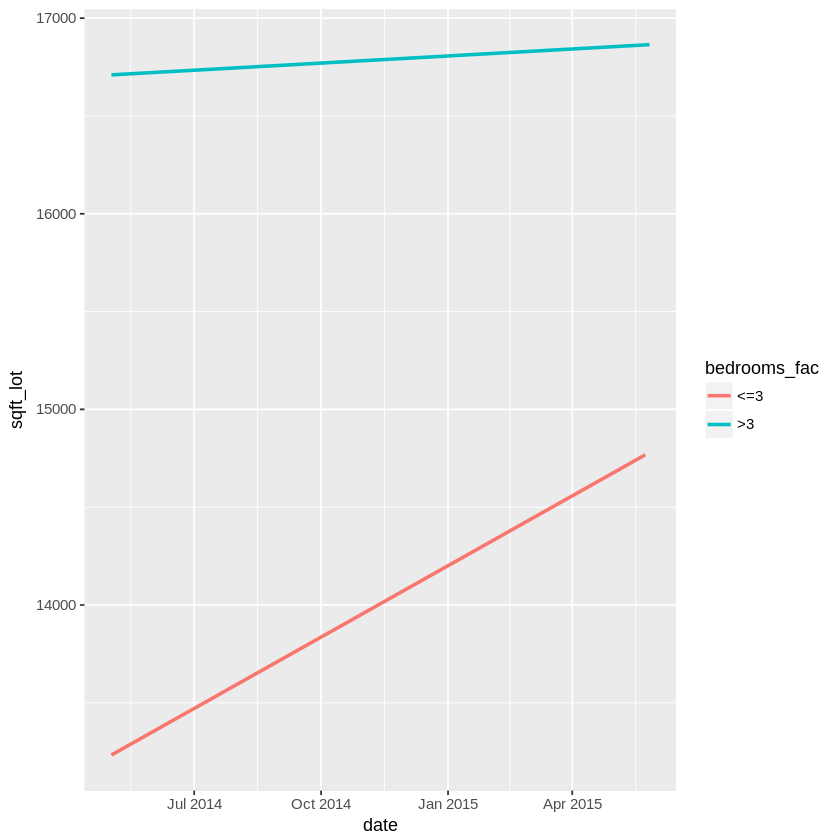

In [18]:
ggplot(df3, mapping = aes(x = date, y = sqft_lot, color = bedrooms_fac)) +  
  geom_smooth(method = "lm", se = FALSE)

Information: 
sqft_lot trend is steeper for homes with <=3 bedrooms.

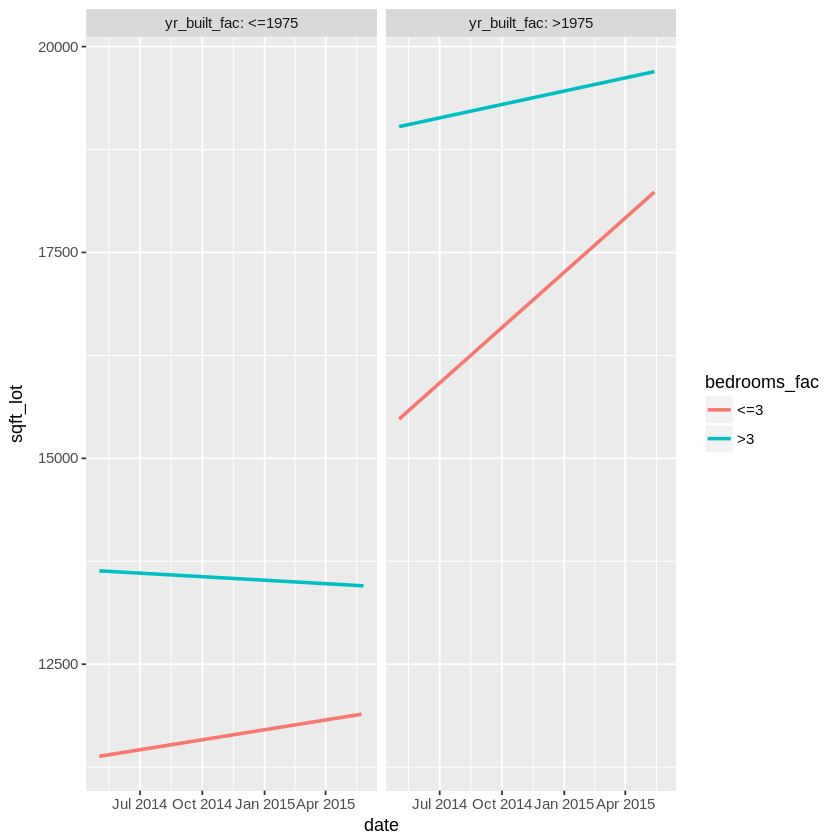

In [19]:
ggplot(df3, mapping = aes(x = date, y = sqft_lot, color = bedrooms_fac)) +  
  #geom_jitter(alpha = 0.1) +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ yr_built_fac, labeller = label_both)

Information: 
sqft_lot trend is steepest (most positive) for homes with yr_built >1975 and <=3 bedrooms, whereas sqft_lot trend is negative for homes with yr_built<=1975 and >3 bedrooms.

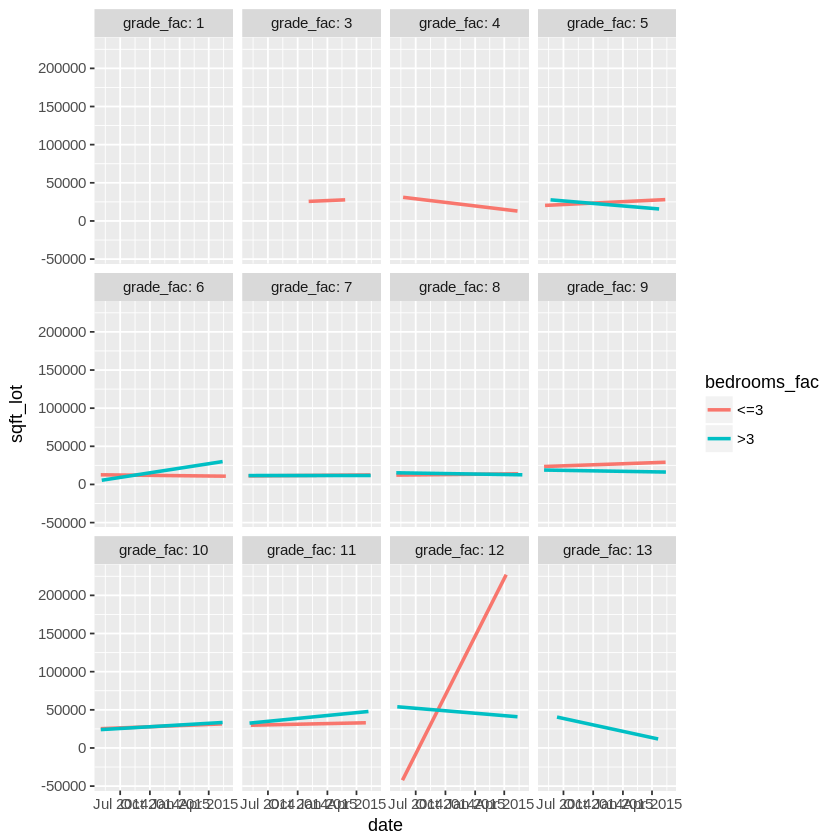

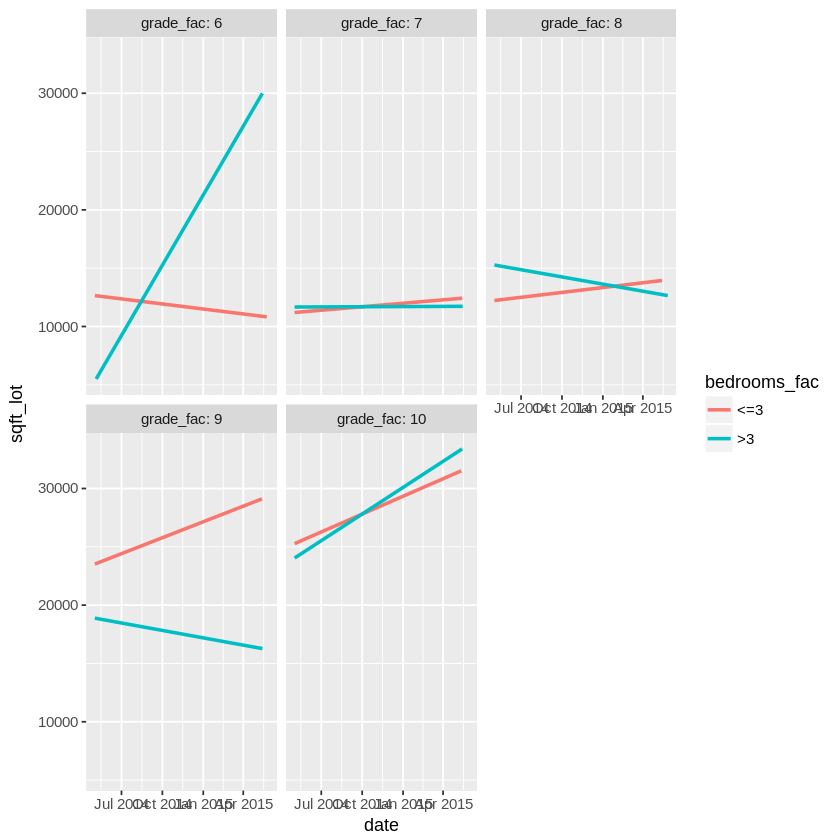

In [20]:
ggplot(df3, mapping = aes(x = date, y = sqft_lot, color = bedrooms_fac)) +  
  #geom_jitter(alpha = 0.1) +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ grade_fac, labeller = label_both)

# filtering for grade_fac with the most observations to reduce the number of levels for clarity
df3_filtered <- df3 %>% filter(grade_fac %in% c(6, 7, 8, 9, 10)) %>% mutate(grade_fac = fct_drop(grade_fac))
#summary(df3_filtered)

ggplot(df3_filtered, mapping = aes(x = date, y = sqft_lot, color = bedrooms_fac)) +  
  #geom_jitter(alpha = 0.1) +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ grade_fac, labeller = label_both)

Information: 
sqft_lot trend is generally positive for homes with <=3 bedrooms between grade 7-10, and in particular for grades 9, 10.
sqft_lot trend is positive for homes with >3 bedrooms with grade 6 and 10. 

Questions:<br>
1. What information can we consider irrelevant to the basic analysis?
<br>
-Time information could be considered irrelevant to the basic analysis. Date may be sufficient for a basic analysis.
<br>-lat and long could be considered irrelevant to the basic analysis, as there are many combinations and a single factor zipcode could be used instead for geographical grouping.
<br>-yr_renovated could be considered irrelevant to the basic analysis. Over 95% of observations are zeros, and it is  unclear whether the data is missing or the home has not be renovated.
<br>-Due to large variations in observations of variables such as price and sqft_living, outliers could be considered irrelevant to the basic analysis because plotting all observations on a scatterplot skews the axis limits.
<br>-Factor levels that have few observations, for example grade 1 (2 observations), grade 3 (3 observations), and condition 1 (30 observations) could be considered irrelevant to the basic analysis.
<br>
2. From any of the charts created, what information or insights may they be conveying?
<br>
-Please see responses below individual plots.